In [2]:
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sess = tf.InteractiveSession()

In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1116ae5f8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x1117a0358>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x11233b9e8>)

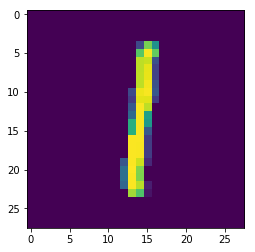

In [6]:
plt.imshow(mnist.train.images[500,].reshape(28,28))

# One Layer Achitecture

In [7]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [8]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [9]:
ws = tf.matmul(x, W) + b
y = tf.nn.softmax(ws)

In [10]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

In [11]:
sess.run(tf.global_variables_initializer())

In [17]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [18]:
for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [19]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [20]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
print("Accuracy : %.4f" % sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Accuracy : 0.9067
